# Deep Q-Network (DQN)

In [1]:
# install necessary tools
# !pip3 install box2d
# !apt-get install python-opengl
# !python -m pip install pyvirtualdisplay

#import libraries
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline


from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

## Environment

In [2]:
env = gym.make('LunarLander-v2')
env.seed(0)

# no of states and actions
env.observation_space.shape, env.action_space.n

((8,), 4)

In [3]:
# variables and methods of env
vars(env), dir(env)

({'env': <gym.envs.box2d.lunar_lander.LunarLander at 0x7fabc00fe160>,
  'action_space': Discrete(4),
  'observation_space': Box(8,),
  'reward_range': (-inf, inf),
  'metadata': {'render.modes': ['human', 'rgb_array'],
   'video.frames_per_second': 50},
  '_max_episode_steps': 1000,
  '_elapsed_steps': None},
 ['__class__',
  '__delattr__',
  '__dict__',
  '__dir__',
  '__doc__',
  '__enter__',
  '__eq__',
  '__exit__',
  '__format__',
  '__ge__',
  '__getattr__',
  '__getattribute__',
  '__gt__',
  '__hash__',
  '__init__',
  '__init_subclass__',
  '__le__',
  '__lt__',
  '__module__',
  '__ne__',
  '__new__',
  '__reduce__',
  '__reduce_ex__',
  '__repr__',
  '__setattr__',
  '__sizeof__',
  '__str__',
  '__subclasshook__',
  '__weakref__',
  '_elapsed_steps',
  '_max_episode_steps',
  'action_space',
  'class_name',
  'close',
  'compute_reward',
  'env',
  'metadata',
  'observation_space',
  'render',
  'reset',
  'reward_range',
  'seed',
  'spec',
  'step',
  'unwrapped'])

In [4]:
# sample observation

observation = env.reset()
observation

array([-5.9156417e-04,  1.4134574e+00, -5.9935719e-02,  1.1277095e-01,
        6.9228926e-04,  1.3576316e-02,  0.0000000e+00,  0.0000000e+00],
      dtype=float32)

## Visualize the Environment with random action policy

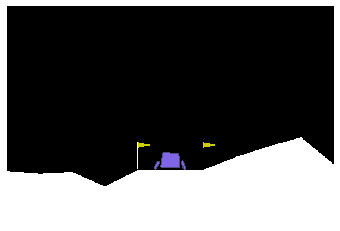

In [5]:
from dqn_agent import Agent

agent = Agent(state_size=8, action_size=4, seed=0)

state = env.reset()
img = plt.imshow(env.render(mode='rgb_array'))
for j in range(200):
    action = agent.act(state)
    img.set_data(env.render(mode='rgb_array')) 
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    state, reward, done, _ = env.step(action)
    if done:
        break 
        
env.close()

### Save the environment frames as GIF

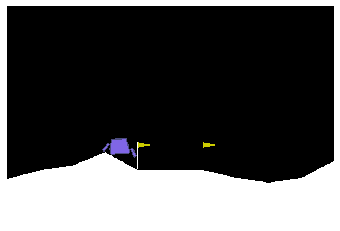

In [6]:
import imageio
images = []

state = env.reset()
img = plt.imshow(env.render(mode='rgb_array'))
for j in range(200):
    action = agent.act(state)
    frame = env.render(mode='rgb_array')
    images.append(frame)
    img.set_data(frame) 
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    state, reward, done, _ = env.step(action)
    if done:
        break 
            
            
imageio.mimsave('intial.gif', images)

## Training the Agent with DQN 

In [7]:
from itertools import count

def dqn(n_episodes=5000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.999):
    scores = []                        
    scores_window = deque(maxlen=100)  
    eps = eps_start                    
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in count():
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       
        scores.append(score)              
        eps = max(eps_end, eps_decay*eps) 
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\nHigh Score: {:.2f}\tAverage Score: {:.2f}\tLow Score: {:.2f}\n'.format(np.max(scores_window), np.mean(scores_window), np.min(scores_window)))
    torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
    return scores

from dqn_agent import Agent

agent = Agent(state_size=8, action_size=4, seed=0)
scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Episode 100	Average Score: -170.90
High Score: 23.20	Average Score: -170.90	Low Score: -606.38

Episode 200	Average Score: -161.03
High Score: 9.26	Average Score: -161.03	Low Score: -400.95

Episode 300	Average Score: -116.91
High Score: 9.17	Average Score: -116.91	Low Score: -484.18

Episode 400	Average Score: -91.395
High Score: 48.28	Average Score: -91.39	Low Score: -388.99

Episode 500	Average Score: -85.69
High Score: 32.55	Average Score: -85.69	Low Score: -306.89

Episode 600	Average Score: -61.30
High Score: 61.73	Average Score: -61.30	Low Score: -348.29

Episode 700	Average Score: -66.15
High Score: 48.60	Average Score: -66.15	Low Score: -339.26

Episode 800	Average Score: -45.78
High Score: 43.63	Average Score: -45.78	Low Score: -377.89

Episode 900	Average Score: -15.65
High Score: 187.25	Average Score: -15.65	Low Score: -432.76

Episode 1000	Average Score: 30.64
High Score: 279.53	Average Score: 30.64	Low Score: -156.75

Episode 1100	Average Score: 53.21
High Score: 246.29	A

KeyboardInterrupt: 

# Visualize the Trained Agent's policy

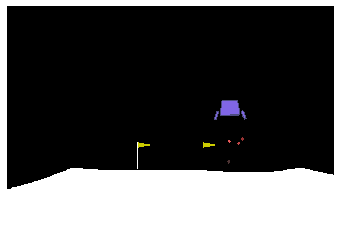

In [5]:
from dqn_agent import Agent
agent = Agent(state_size=8, action_size=4, seed=0)
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth', map_location=lambda storage, loc: storage))

for i in range(3):
    
    state = env.reset()
    img = plt.imshow(env.render(mode='rgb_array'))
    for j in range(200):
        action = agent.act(state)
        img.set_data(env.render(mode='rgb_array')) 
        plt.axis('off')
        display.display(plt.gcf())
        display.clear_output(wait=True)
        state, reward, done, _ = env.step(action)
        if done:
            break 
            
env.close()

In [ ]:
import imageio
images = []

state = env.reset()
img = plt.imshow(env.render(mode='rgb_array'))
for j in range(200):
    action = agent.act(state)
    frame = env.render(mode='rgb_array')
    images.append(frame)
    img.set_data(frame) 
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    state, reward, done, _ = env.step(action)
    if done:
        break 
            
            
imageio.mimsave('trained_agent.gif', images)


from IPython.display import Image
Image(filename='trained_agent.gif')